<a href="https://colab.research.google.com/github/neuralabc/PythonTools4Neuroimaging/blob/main/Nighres_Installation_and_Mini_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Installation**
Some of the neuroimaging toolboxes are included in pre-compiled python packages, which you can install with 'pip install'. However, many tools combine python with C++ or Java, and require a more complicated installation procedure.

Here, we will first connect the notebook with your google drive which contains software folders, then custom-install the contents. Because the notebooks start from scratch every time, we will have to do some (but thankfully not all) of these steps every time.

1. Mount your google drive with some of the required software packages pre-installed, the notebooks, and the data

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


2. Install tools needed to get the software running (Java, JCC, ...)

In [ ]:
!apt update
!apt install openjdk-8-jdk
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!update-alternatives --set javac /usr/lib/jvm/java-8-openjdk-amd64/bin/javac
!javac -version

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,081 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,342 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,004 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu ja

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/software/JCC-3.12/')
os.environ['JCC_JDK'] ='/usr/lib/jvm/java-8-openjdk-amd64'
!python setup.py install

Applied shared mode monkeypatch to: <module 'setuptools' from '/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py'>
Loading source files for package org.apache.jcc...
Constructing Javadoc information...
Standard Doclet version 11.0.20.1
Building tree for all the packages and classes...
Generating javadoc/org/apache/jcc/PythonException.html...
Generating javadoc/org/apache/jcc/PythonVM.html...
Generating javadoc/org/apache/jcc/package-summary.html...
Generating javadoc/org/apache/jcc/package-tree.html...
Generating javadoc/constant-values.html...
Generating javadoc/serialized-form.html...
Building index for all the packages and classes...
Generating javadoc/overview-tree.html...
Generating javadoc/index-all.html...
Building index for all classes...
Generating javadoc/allclasses-index.html...
Generating javadoc/allpackages-index.html...
Generating javadoc/deprecated-list.html...
Building index for all classes...
Generating javadoc/allclasses.html...
Generating javadoc/allclas

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/software/nighres/')
!bash build.sh
!python3 -m pip install .

M	.travis-functions.sh
M	build-scripts/build-cbstools-python-release
M	build-scripts/build-cbstools-release-linux
M	build-scripts/compile-allcbstools-linux
M	build-scripts/compile-allcbstools-mac
M	build-scripts/compile-allcbstools-nodep-linux
M	build-scripts/compile-cbstools-linux
M	build-scripts/compile-cbstools-mac
M	build-scripts/compile-cbstools-package
M	de/mpg/cbs/jist/shape/JistShapeLevelsetFullPCA.java
M	de/mpg/cbs/structures/critical186LUT.raw.gz
M	de/mpg/cbs/structures/critical266LUT.raw.gz
M	de/mpg/cbs/structures/critical618LUT.raw.gz
M	de/mpg/cbs/structures/critical626LUT.raw.gz
M	de/mpg/cbs/structures/critical66LUT.raw.gz
M	de/mpg/cbs/structures/criticalWCLUT.raw.gz
M	external-scripts/N4Correction.sh
M	external-scripts/embedded_SyN.sh
M	external-scripts/freesurfer.sh
M	external-scripts/freesurfer_v2.sh
M	external-scripts/multiscaleRegistrationSyN_1contrast.sh
M	external-scripts/multiscaleRegistrationSyN_2contrasts.sh
M	external-scripts/multiscaleRegistrationSyN_3contrasts

Did it work? Let's try running a small script

# **First steps with Nighres**

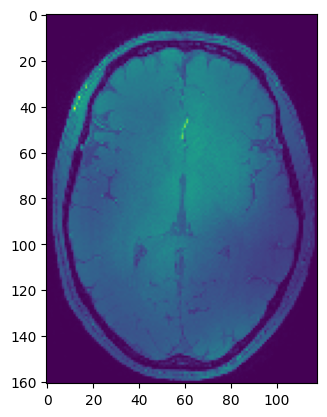

In [ ]:
import nighres
img = nighres.io.load_volume('/content/gdrive/MyDrive/Colab Notebooks/ani-data/mp2rageme/sub-A_ses-1_acq-wb_inv-2_echo-1_part-mag_mprage_scale-2.nii.gz')
import matplotlib.pyplot as plt
plt.imshow(img.get_fdata()[:,75,:])


Intensity-based Skull Stripping


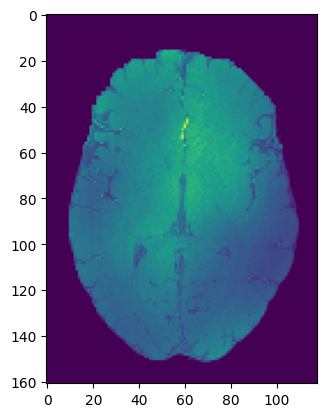

In [ ]:
stripped = nighres.brain.intensity_based_skullstripping(img)
plt.imshow(stripped['main_masked'].get_fdata()[:,75,:])

So far so good? Then let's look at some analysis pipelines

# **Quantitative MRI**

With quantitative MRI, multiple images acquired at the same time are used to compute MR parameters, rather than look at T1-, T2*- and susceptibility-weighted images.

Some methods for quantitative MRI computation are fairly simple (T2* estimation is line fitting done in log domain), others not so much (e.g. T1 or QSM). The methods included in nighres focus on the MP2RAGEME sequence, other multi-parametric sequences (e.g. MPM) may require different toolboxes.

First, let's set our data and result directories, and load a few useful libraries:

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/')
os.makedirs('nighres-tutorial/',exist_ok=True)
data_dir = '/content/gdrive/MyDrive/Colab Notebooks/ani-data/'
result_dir = '/content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/'

!pip install nilearn

!pip install pyvista
!apt-get install libgl1-mesa-glx xvfb
!pip install ipygany

import nibabel
import nilearn.plotting as nlplot
import numpy
import pyvista

# set up 3D visualization
pyvista.start_xvfb()
from google.colab import output
output.disable_custom_widget_manager()
output.enable_custom_widget_manager()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 8.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxfont2 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libgl1-mesa-glx libxfont2 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 8 newly installed, 0 to remove and 25 not upgraded.
Need to get 7,732 kB of archives.
After this operation, 11.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libgl1-mesa-glx amd64 23.0.4-0ubuntu1~22.04.1 [5,584 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1bu

Working with multi-parametric data usually requires handling many image files (10 in the case of the MP2RAGEME), sometimes partially in 4D stacks (magnitude+phase, or for multiple echoes). Here we have everything separated in BIDS-like format, but we can still create shortcut variables:

In [ ]:
inv1m = data_dir+'mp2rageme/'+'sub-A_ses-1_acq-wb_inv-1_part-mag_mprage_scale-2.nii.gz'
inv1p = data_dir+'mp2rageme/'+'sub-A_ses-1_acq-wb_inv-1_part-ph_mprage_scale-2.nii.gz'

inv2e1m = data_dir+'mp2rageme/'+'sub-A_ses-1_acq-wb_inv-2_echo-1_part-mag_mprage_scale-2.nii.gz'
inv2e1p = data_dir+'mp2rageme/'+'sub-A_ses-1_acq-wb_inv-2_echo-1_part-ph_mprage_scale-2.nii.gz'

inv2e2m = data_dir+'mp2rageme/'+'sub-A_ses-1_acq-wb_inv-2_echo-2_part-mag_mprage_scale-2.nii.gz'
inv2e2p = data_dir+'mp2rageme/'+'sub-A_ses-1_acq-wb_inv-2_echo-2_part-ph_mprage_scale-2.nii.gz'

inv2e3m = data_dir+'mp2rageme/'+'sub-A_ses-1_acq-wb_inv-2_echo-3_part-mag_mprage_scale-2.nii.gz'
inv2e3p = data_dir+'mp2rageme/'+'sub-A_ses-1_acq-wb_inv-2_echo-3_part-ph_mprage_scale-2.nii.gz'

inv2e4m = data_dir+'mp2rageme/'+'sub-A_ses-1_acq-wb_inv-2_echo-4_part-mag_mprage_scale-2.nii.gz'
inv2e4p = data_dir+'mp2rageme/'+'sub-A_ses-1_acq-wb_inv-2_echo-4_part-ph_mprage_scale-2.nii.gz'

##Quantitative T2* fitting

Let’s start with T2* fitting, as it is the simplest quantitative map to get.

First check out what parameters the module needs:

In [ ]:
?nighres.intensity.flash_t2s_fitting

The relevant parameters for T2* fitting are the 4 echo times. In our case, the sequence parameters are: 3 ms, 11.5 ms, 20 ms, and 28.5 ms. What images do we need, too? The ones from the second inversion, as it is the one with the four echoes. But magnitude or phase? Here we use magnitude (you could try phase and see what it looks like).

In [ ]:
t2smapping = nighres.intensity.flash_t2s_fitting(image_list=[inv2e1m,inv2e2m, \
                                                 inv2e3m,inv2e4m],
                                                 te_list=[3.0,11.5,20.0,28.5],
                                                 save_data=True,output_dir=result_dir,
                                                 file_name='inv2m.nii.gz')
# Python note: you need to add a '\' if you split an array index [ ]
# but you can split a list of parameters without it

# Python note: we are giving the algorithms a variable name, here 't1mapping'.
# the algorithm and its variables are then easier to reference, and its outputs
# are in a dictionary (see below)

# Nighres note: in Nighres modules check whether computations have been run or
# not, and skip them if the output files exist. You can force overwriting with
# the input option 'overwrite=True'

# Nighres note again: file names given to modules serve as base names for the
# output, which adds suffixes related to the module and its outputs


T2* Fitting

Outputs will be saved to /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/


Let's have a look!

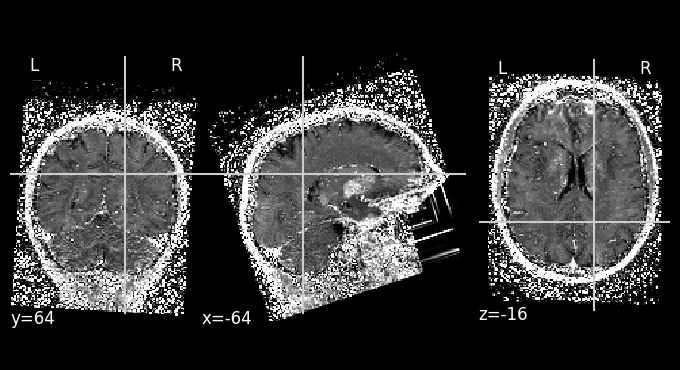

In [ ]:
nlplot.plot_anat(t2smapping['r2s'],vmax=0.1, cut_coords=[-64,64,-16])

##T1 quantitative mapping

Now for a T1 map. There are a few more parameters to set...

Note that units matter (milliseconds vs. seconds), and that python likes to have .0 on its float numbers, to tell them apart from int (it is very picky about data type, which is a good thing, but something easy to forget). In terms of data, we need to use first and second inversion with matched echo times (TE):


T1 Mapping

Outputs will be saved to /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/


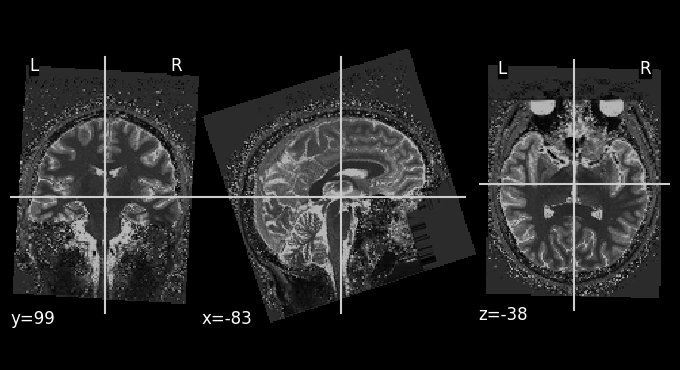

In [ ]:
t1mapping = nighres.intensity.mp2rage_t1_mapping(excitation_TR=[0.0062,0.0314],
                                                 flip_angles=[7.0,6.0],
                                                 inversion_TR=6.720,
                                                 inversion_times=[0.607,3.855],
                                                 N_excitations=150,
                                                 first_inversion=[inv1m,inv1p],
                                                 second_inversion=[inv2e1m,inv2e1p],
                                                 save_data=True,output_dir=result_dir,
                                                 file_name='inv12.nii.gz')

nlplot.plot_anat(t1mapping['t1'])

# **Cortical segmentation and analysis**

From the quantitative maps, we can extract geometric representations of the cortex and other structures, and map information on there.

First, we process the brain is steps: skull-stripping, whole brain segmentation, then cortical reconstruction.


Intensity-based Skull Stripping

Outputs will be saved to /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/
skip computation (use existing results)


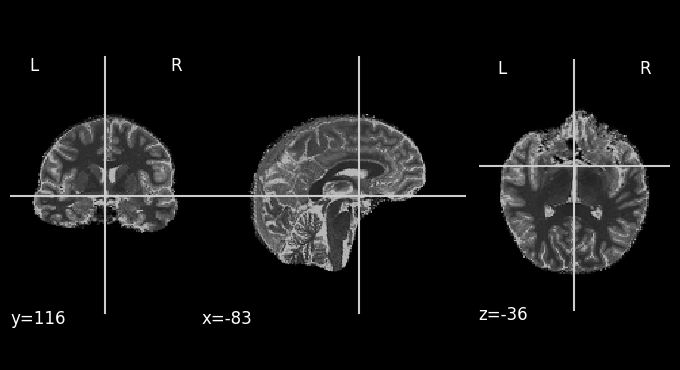

In [ ]:
stripped = nighres.brain.intensity_based_skullstripping(inv2e1m,extra_image=t1mapping['t1'],
                                                        save_data=True,output_dir=result_dir)

nlplot.plot_anat(stripped['extra_masked'])


MGDM Segmentation

Outputs will be saved to /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/
skip computation (use existing results)


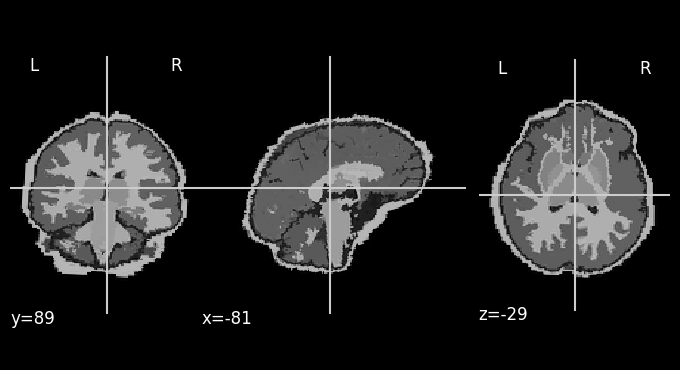

In [ ]:
t1map = nibabel.as_closest_canonical(nighres.io.load_volume(stripped['extra_masked']))

mgdm = nighres.brain.mgdm_segmentation(
                        contrast_image1=t1map,
                        contrast_type1="T1map7T",
                        save_data=True,
                        output_dir=result_dir)

nlplot.plot_anat(mgdm['segmentation'],cmap='gray')


Extract Brain Region

Outputs will be saved to /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/nighres.brain.mgdm_segmentation_mgdm-seg_xmask-rcrwm.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/nighres.brain.mgdm_segmentation_mgdm-seg_xproba-rcrwm.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/nighres.brain.mgdm_segmentation_mgdm-seg_xlvl-rcrwm.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/nighres.brain.mgdm_segmentation_mgdm-seg_xmask-rcrgm.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/nighres.brain.mgdm_segmentation_mgdm-seg_xproba-rcrgm.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/nighres.brain.mgdm_segmentation_mgdm-seg_xlvl-rcrgm.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/nighres.brain.mgdm_segmentation_mgdm-seg_xmask-rcrbg.nii.gz

Saving /content/gd

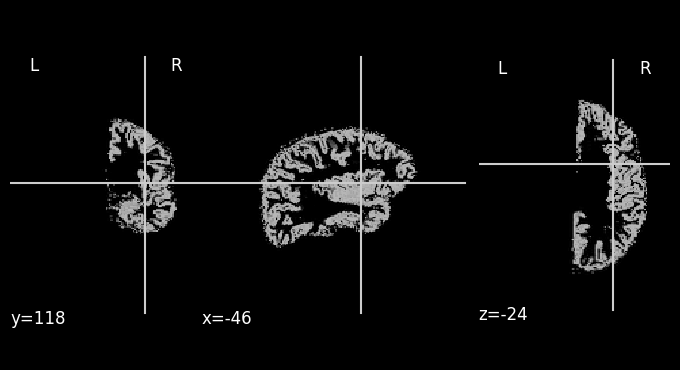

In [ ]:
region = nighres.brain.extract_brain_region(mgdm['segmentation'],
                                            mgdm['distance'],
                                            mgdm['memberships'],
                                            mgdm['labels'],
                                            extracted_region='right_cerebrum',
                                            save_data=True,overwrite=False,output_dir=result_dir)

nlplot.plot_anat(region['region_proba'])


CRUISE Cortical Extraction

Outputs will be saved to /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/cortex_cruise-cortex.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/cortex_cruise-gwb.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/cortex_cruise-cgb.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/cortex_cruise-avg.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/cortex_cruise-thick.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/cortex_cruise-pwm.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/cortex_cruise-pgm.nii.gz

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/cortex_cruise-pcsf.nii.gz


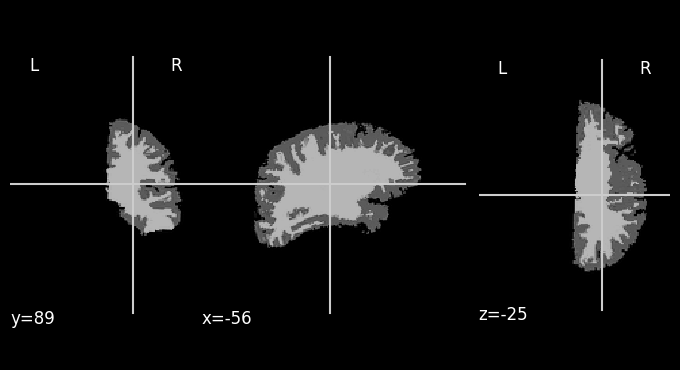

In [ ]:
cortex = nighres.cortex.cruise_cortex_extraction(init_image=region['inside_mask'],
                                                 wm_image=region['inside_proba'],
                                                 gm_image=region['region_proba'],
                                                 csf_image=region['background_proba'],
                                                 save_data=True,overwrite=False,output_dir=result_dir,
                                                 file_name='cortex.nii.gz')

nlplot.plot_anat(cortex['cortex'])

OK, this looks nice but we want surfaces! How do we get those?

## Mesh building

Once we have level set surface images, we can generate 3D meshes from them as follows, and
visualize them as VTK files.

Note: there are many file formats for 3D mesh data, and not a lot of good correspondence tools. Many software will work with one or a few types, and ignore the rest entirely (the problem moslty comes from the fact that 3D meshes are used in vastly different contexts).


Levelset to Mesh

Outputs will be saved to /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/

Saving /content/gdrive/MyDrive/Colab Notebooks/nighres-tutorial/cortex-surface_l2m-mesh.vtk


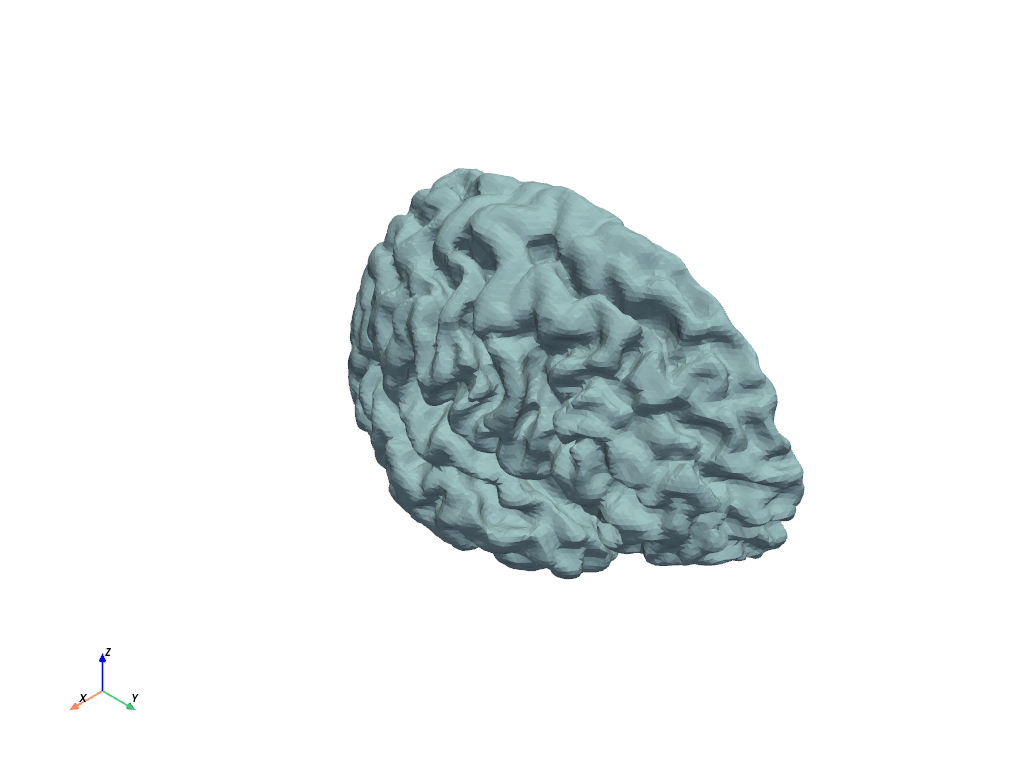

In [ ]:
mesh = nighres.surface.levelset_to_mesh(levelset_image=cortex['avg'],
                                        save_data=True,overwrite=False,output_dir=result_dir,
                                        file_name='cortex-surface.vtk')

surface = pyvista.read(mesh['result'])
surface.plot(interactive=True,notebook=True,jupyter_backend='ipygany')

In [ ]:
?nighres.parcellation.massp

In [ ]:
?nighres.intensity.lcpca_denoising


In [ ]:
?nighres.intensity.boundary_